In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from skimage.feature import hog
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from skimage.color import rgb2gray

## Data

In [2]:
#path martim
#path = "../../../../DadosProj/UTKFace/"
#path alex
path = "../../../data_project/UTKFace/"

files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


### Extraction with PreProcessing

**Changes to images with opencv methods**

- Obtain better contrast for images normalizing the ranges for colors for a pixel between 0 and 255
 - instance = cv2.normalize(instance, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

- Converting to YUV color model, equalizing color histogram to modify 
- distribution of colors taking luminosity into account and
- reconverting to RBG after doing histogram equalization
    - img_yuv = cv2.cvtColor(instance, cv2.COLOR_BGR2YUV)
    - img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    - instance = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

In [10]:
images = []
ages = []
genders = []
ethnicities = []
counter = 0

for file in files:
    if counter == 500:
        break
    
    image = cv2.imread(path+file)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, dsize = (200,200))
    image = image.reshape((image.shape[0], image.shape[1], 3))

    images.append(image)
    delimit = file.split('_')
    ages.append(int(delimit[0]))
    # first number is age (0-116 possible values)
    genders.append(int(delimit[1]))
    # second number is gender (0 for male, 1 for female)
    ethnicities.append(int(delimit[2]))
    # third number is ethnicity 
    # (0 for white, 1 for black, 2 for asian, 3 for indian, 4 for any other ethnicity)

    counter += 1

### Data Analysis

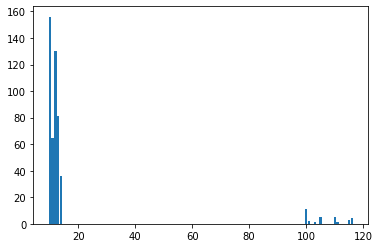

Max value: 116


In [11]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max value:",max(ages))

In [13]:
img_all = pd.DataFrame()
img_all["age"] = ages
img_all["ethnicity"] = ethnicities
img_all["gender"] = genders
#To add the extra features from using cnn/opencv feat extraction

img_gender = pd.DataFrame()
img_gender["gender"] = genders

img_age = pd.DataFrame()
img_age["age"] = ages

#display(img_all)
#display(img_gender)
#display(img_age)

In [15]:
print("unique values for age are", img_age.age.unique())
print("unique values for ethnicity are", img_all.ethnicity.unique())
print("unique values for gender are", img_gender.gender.unique())

unique values for age are [100 101 103 105  10 110 111 115 116  11  12  13  14]
unique values for ethnicity are [0 2 1 3 4]
unique values for gender are [0 1]


In [2]:
var_1 = [1, 2, 3]
%store var_1
#no outro .ipynb --> %store -r var_1

Stored 'var_1' (list)


Gender: 1 Age: 105 Ethnicitie 0


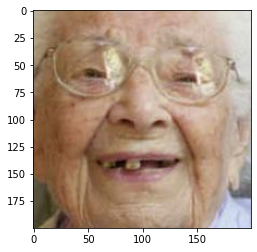

In [17]:
def display(img):
    plt.imshow(img)
    plt.show()
    
idx = 15
if idx < len(images):
    sample = images[idx]
    print("Gender:", genders[idx], "Age:", ages[idx], "Ethnicitie", ethnicities[idx])
    display(sample)
else:
    print(f"Index {idx} is out of range for the list of {len(images)} images")

## Feature extraction and Normalization

- Sure! This code extracts Histogram of Oriented Gradients (HOG) features from a list of preprocessed images, normalizes the features to have zero mean and unit variance, and stores them in a NumPy array called hog_features_norm

### HOG

In [387]:
from skimage.feature import hog
from skimage import data, exposure

In [388]:
gray_images = np.array([rgb2gray(image) for image in images])

C:\Users\afbso\AppData\Local\Temp\ipykernel_29240\2045816818.py:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),


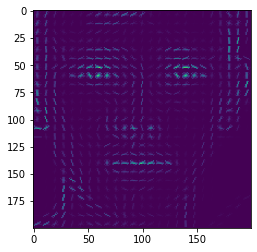

In [389]:
image_check = images[25]

# define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# compute HOG features and visualize them
hog_features, hog_image = hog(image_check, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, visualize=True,channel_axis=2)



# rescale image intensity for better visualization
#hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# display HOG features
plt.imshow(hog_image)
plt.show()

In [ ]:
# Extract HOG features from the images
hog_features = []
for img in images:
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, feature_vector=True, multichannel=True, channel_axis=2)
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)

# Normalize the features to have zero mean and unit variance
mean = np.mean(hog_features, axis=0)
std = np.std(hog_features, axis=0)
hog_features_norm = (hog_features - mean) / std

In [309]:
for i, arr in enumerate(hog_features_norm):
    print(f"Descriptor array {i} shape: {arr.shape}")

Descriptor array 0 shape: (20736,)
Descriptor array 1 shape: (20736,)
Descriptor array 2 shape: (20736,)
Descriptor array 3 shape: (20736,)
Descriptor array 4 shape: (20736,)
Descriptor array 5 shape: (20736,)
Descriptor array 6 shape: (20736,)
Descriptor array 7 shape: (20736,)
Descriptor array 8 shape: (20736,)
Descriptor array 9 shape: (20736,)
Descriptor array 10 shape: (20736,)
Descriptor array 11 shape: (20736,)
Descriptor array 12 shape: (20736,)
Descriptor array 13 shape: (20736,)
Descriptor array 14 shape: (20736,)
Descriptor array 15 shape: (20736,)
Descriptor array 16 shape: (20736,)
Descriptor array 17 shape: (20736,)
Descriptor array 18 shape: (20736,)
Descriptor array 19 shape: (20736,)
Descriptor array 20 shape: (20736,)
Descriptor array 21 shape: (20736,)
Descriptor array 22 shape: (20736,)
Descriptor array 23 shape: (20736,)
Descriptor array 24 shape: (20736,)
Descriptor array 25 shape: (20736,)
Descriptor array 26 shape: (20736,)
Descriptor array 27 shape: (20736,)
De

- For each preprocessed image in images, extract the HOG features using the hog() function from scikit-image. The orientations, pixels_per_cell, and cells_per_block parameters control the number of orientations, the size of the cells, and the number of cells per block used in the feature extraction process. The transform_sqrt parameter applies power law compression to normalize the local contrast of the image. The feature_vector parameter flattens the HOG descriptor into a 1D array. The multichannel and channel_axis parameters are used to indicate that the input image has three channels. The resulting HOG feature is then appended to the hog_features list.

#### SVM

In [310]:
X_train, X_test, y_train, y_test = train_test_split(hog_features_norm, genders, test_size=0.2, random_state=42)
print("Samples in Training:",X_train.shape[0])
print("Samples in Testing:",X_test.shape[0])

Samples in Training: 40
Samples in Testing: 10


In [311]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


## ORB (Oriented FAST and Rotated BRIEF)

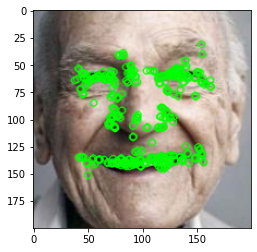

In [435]:
image_check = images[1]

orb = cv2.ORB_create(500)

kp = orb.detect(image_check, None)

kp, des = orb.compute(image_check, kp)

img2 = cv2.drawKeypoints(image_check, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

In [436]:
orb = cv2.ORB_create()
orb_features = []
Genders = []
MIN_KEYPOINTS = 500
MAX_KEYPOINTS = 500

for i, img in enumerate(images):
    
    keypoints, descriptors = orb.detectAndCompute(img, None)
    keypoints, descriptors = orb.compute(image_check, keypoints)
    
    if len(keypoints) < MIN_KEYPOINTS:
        continue  
    if len(keypoints) > MAX_KEYPOINTS:
        continue 
    
    orb_features.append(np.ndarray.flatten(descriptors))
    Genders.append(genders[i]) 

In [437]:
len(orb_features)

0

In [438]:
len(Genders)

0

In [430]:
for i, arr in enumerate(orb_features):
    print(f"Descriptor array {i} shape: {arr.shape}")

Descriptor array 0 shape: (1600,)
Descriptor array 1 shape: (1600,)
Descriptor array 2 shape: (1600,)
Descriptor array 3 shape: (1600,)
Descriptor array 4 shape: (1600,)
Descriptor array 5 shape: (1600,)
Descriptor array 6 shape: (1600,)
Descriptor array 7 shape: (1600,)
Descriptor array 8 shape: (1600,)
Descriptor array 9 shape: (1600,)
Descriptor array 10 shape: (1600,)
Descriptor array 11 shape: (1600,)
Descriptor array 12 shape: (1600,)
Descriptor array 13 shape: (1600,)
Descriptor array 14 shape: (1600,)
Descriptor array 15 shape: (1600,)
Descriptor array 16 shape: (1600,)
Descriptor array 17 shape: (1600,)
Descriptor array 18 shape: (1600,)
Descriptor array 19 shape: (1600,)
Descriptor array 20 shape: (1600,)
Descriptor array 21 shape: (1600,)
Descriptor array 22 shape: (1600,)
Descriptor array 23 shape: (1600,)
Descriptor array 24 shape: (1600,)
Descriptor array 25 shape: (1600,)
Descriptor array 26 shape: (1600,)
Descriptor array 27 shape: (1600,)
Descriptor array 28 shape: (16

In [431]:
mean = np.mean(orb_features, axis=0)
std = np.std(orb_features, axis=0)
orb_features_norm = (orb_features - mean) / std

#### SVM

In [432]:
X_train, X_test, y_train, y_test = train_test_split(orb_features_norm, Genders, test_size=0.2, random_state=42)
print("Samples in Training:",X_train.shape[0])
print("Samples in Testing:",X_test.shape[0])

Samples in Training: 64
Samples in Testing: 16


In [433]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [434]:
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5


## BRISK (Binary Robust Invariant Scalable Keypoints) 

In [101]:
import cv2
import numpy as np
import glob

# Create BRISK detector
brisk = cv2.BRISK_create()

# Initialize list to store descriptors
brisk_features = []

# Loop over input images
for img in images:
    
    # Detect keypoints and compute descriptors
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    
    # Add descriptors to list
    brisk_features.append(descriptors)

# Concatenate descriptors into feature matrix
X = np.vstack(brisk_features)

# Create labels for each image
y = np.array([0, 1, 2, ...])  # Replace with actual labels for each image



ValueError: Found input variables with inconsistent numbers of samples: [8088, 4]

In [102]:
X = np.load('features.npy')
y = np.load('labels.npy')

# Check the shapes of the arrays
print(X.shape)  # should print (8088, n_features)
print(y.shape)  # should print (8088,)

FileNotFoundError: [Errno 2] No such file or directory: 'features.npy'

In [ ]:
# Train support vector machine on feature matrix X and labels y
svm = svm.SVC(kernel='linear', C=1.0)
svm.fit(X, y)

### CNN